Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Read test and train data
test = 'C:\\Users\\praja\\Downloads\\Project-Housing--2---1-\\Project-Housing_splitted\\test.csv'
test_df = pd.read_csv(test)

train = 'C:\\Users\\praja\\Downloads\\Project-Housing--2---1-\\Project-Housing_splitted\\train.csv'
train_df = pd.read_csv(train)

In [3]:
print("Rows     : ", train_df.shape[0])
print("Columns  : ", train_df.shape[1])
print("\nFeatures : \n", train_df.columns.tolist())
print("\nMissing values :  ", train_df.isnull().sum().values.sum())
print("\nUnique values :  \n", train_df.nunique())

Rows     :  1168
Columns  :  81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
# Remove duplicates from training data
train_df.duplicated(subset=None, keep="first")
print("Train", train_df.shape)

Train (1168, 81)


In [6]:
# Check for nulll value
train_df.isnull().sum().sort_values(ascending=False)

PoolQC         1161
MiscFeature    1124
Alley          1091
Fence           931
FireplaceQu     551
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [7]:
null = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "LotFrontage",
    "GarageCond",
    "GarageType",
    "GarageYrBlt",
    "GarageFinish",
    "GarageQual",
    "BsmtExposure",
    "BsmtFinType2",
    "BsmtFinType1",
    "BsmtCond",
    "BsmtQual",
    "MasVnrArea",
    "MasVnrType",
    "Electrical",]
train_df[null].info()

#lets assume null values are beacause houses does not have those facilities
values = {
    "PoolQC": "No Pool",
    "MiscFeature": "No Feature",
    "Alley": "No alley",
    "Fence": "No Fence",
    "FireplaceQu": "No Fireplace",
    "GarageCond": "No Garage",
    "GarageType": "No Garage",
    "GarageArea": 0,
    "GarageYrBlt": "None built",
    "GarageFinish": "No Garage",
    "GarageQual": "No Garage",
    "BsmtExposure": "No Basement",
    "BsmtFinType2": "Not Applicable",
    "BsmtFinType1": "Not Applicable",
    "BsmtCond": "No Basement",
    "BsmtQual": "No Basement",
    "MasVnrArea": 0,
    "MasVnrType": "No Veneer",
    "LotFrontage": 0,
}

train_df.fillna(value=values, inplace=True)
test_df.fillna(value=values, inplace=True)

train_df.isnull().sum().sort_values(ascending=False)

# for other null values we will replace with the mode
features = train_df.select_dtypes(include=["object"]).columns

for features in features:
    train_df[features].fillna(train_df[features].mode()[0], inplace=True)
    test_df[features].fillna(test_df[features].mode()[0], inplace=True)
    
    
# some basement values are NAN when they should be zero
Basementmetrics = [
    "BsmtHalfBath",
    "BsmtFullBath",
    "BsmtFinSF1",
    "GarageCars",
    "TotalBsmtSF",
    "BsmtUnfSF",
    "BsmtFinSF2",
]

for Basementmetrics in Basementmetrics:
    test_df.loc[(test_df[Basementmetrics].isnull()), Basementmetrics] = 0
    train_df.loc[(train_df[Basementmetrics].isnull()), Basementmetrics] = 0

# null info for Garage cars should be replaced
test_df.loc[(test_df.GarageCars.isnull()), "GarageCars"] = 0
train_df.loc[(train_df.GarageCars.isnull()), "GarageCars"] = 0

print("Test", test_df.shape, "Train", train_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   44 non-null     object 
 2   Alley         77 non-null     object 
 3   Fence         237 non-null    object 
 4   FireplaceQu   617 non-null    object 
 5   LotFrontage   954 non-null    float64
 6   GarageCond    1104 non-null   object 
 7   GarageType    1104 non-null   object 
 8   GarageYrBlt   1104 non-null   float64
 9   GarageFinish  1104 non-null   object 
 10  GarageQual    1104 non-null   object 
 11  BsmtExposure  1137 non-null   object 
 12  BsmtFinType2  1137 non-null   object 
 13  BsmtFinType1  1138 non-null   object 
 14  BsmtCond      1138 non-null   object 
 15  BsmtQual      1138 non-null   object 
 16  MasVnrArea    1161 non-null   float64
 17  MasVnrType    1161 non-null   object 
 18  Electrical    1168 non-null 

C:\Users\praja\anaconda3\lib\site-packages\pandas\core\algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  warn(f"Unable to sort modes: {err}")


In [8]:
# Year built converted into category or str

train_df.YearBuilt = train_df.YearBuilt.astype(str)
test_df.YearBuilt = test_df.YearBuilt.astype(str)

train_df.YrSold = train_df.YrSold.astype(str)
test_df.YrSold = test_df.YrSold.astype(str)

train_df.GarageYrBlt = train_df.GarageYrBlt.astype(str)
test_df.GarageYrBlt = test_df.GarageYrBlt.astype(str)

train_df.YearRemodAdd = train_df.YearRemodAdd.astype(str)
test_df.YearRemodAdd = test_df.YearRemodAdd.astype(str)


MSSUbCLass = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}

OverallQual_Cond = {
    10: "Very Excellent",
    9: "Excellent",
    8: "Very Good",
    7: "Good",
    6: "Above Average",
    5: "Average",
    4: "Below Average",
    3: "Fair",
    2: "Poor",
    1: "Very Poor",
}

train_df.replace({"OverallQual": OverallQual_Cond,"OverallCond": OverallQual_Cond,"MSSubClass": MSSUbCLass,}, inplace=True,)

test_df.replace({"OverallQual": OverallQual_Cond,"OverallCond": OverallQual_Cond,"MSSubClass": MSSUbCLass,}, inplace=True,)

print("Test", test_df.shape, "Train", train_df.shape)

Test (292, 80) Train (1168, 81)


In [9]:
train_df.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,57.982021,10484.749144,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,...,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,181477.005993
std,416.159877,35.471226,8957.442311,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,...,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,79105.586863
min,1.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,360.500000,41.750000,7621.500000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,...,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,130375.000000
50%,714.500000,64.000000,9522.500000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,...,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163995.000000
75%,1079.500000,79.250000,11515.500000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000
max,1460.000000,313.000000,164660.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


C:\Users\praja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


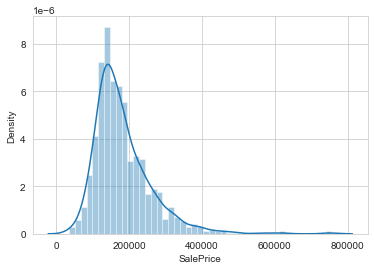

C:\Users\praja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


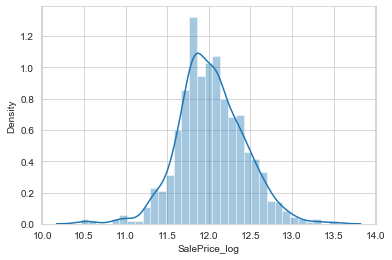

In [10]:
x = train_df.SalePrice
sns.set_style("whitegrid")
sns.distplot(x)
plt.show()

train_df["SalePrice_log"] = np.log(train_df.SalePrice)
x = train_df.SalePrice_log
sns.distplot(x)
plt.show()

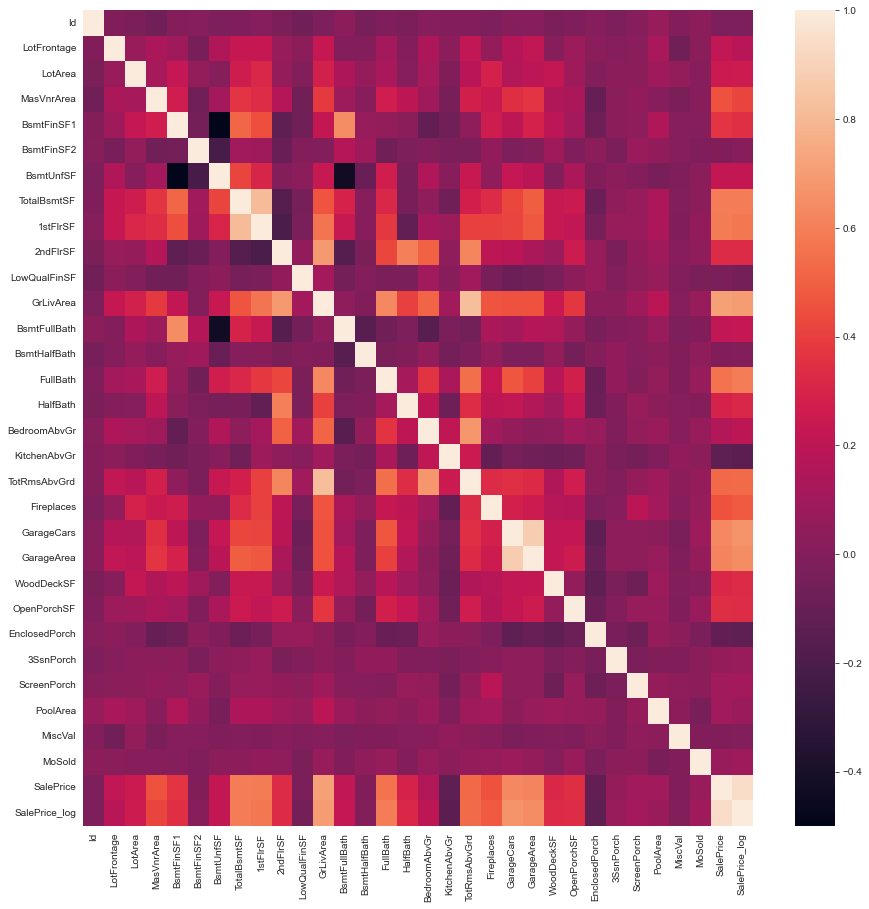

In [11]:
# correlations in our data
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr())
plt.savefig("pearsonsmep.png")

C:\Users\praja\AppData\Local\Temp/ipykernel_10492/2577213424.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

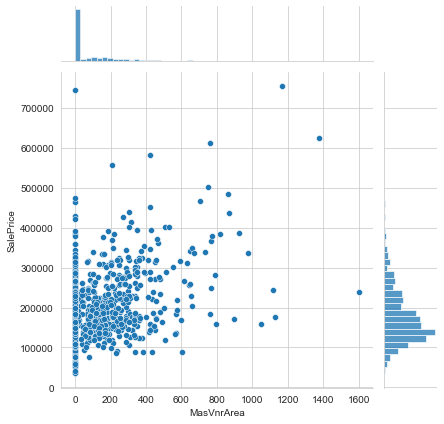

<Figure size 720x720 with 0 Axes>

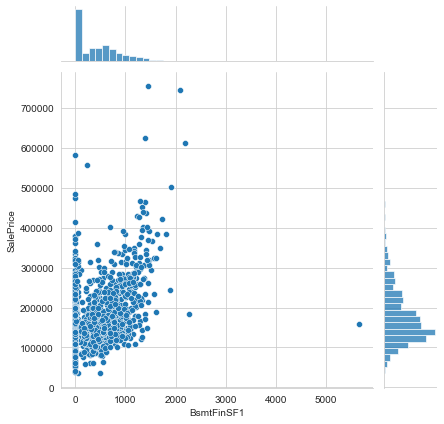

<Figure size 720x720 with 0 Axes>

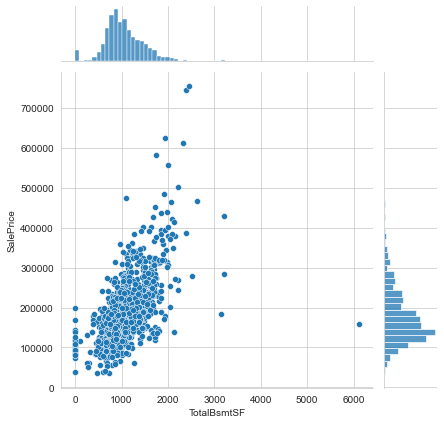

<Figure size 720x720 with 0 Axes>

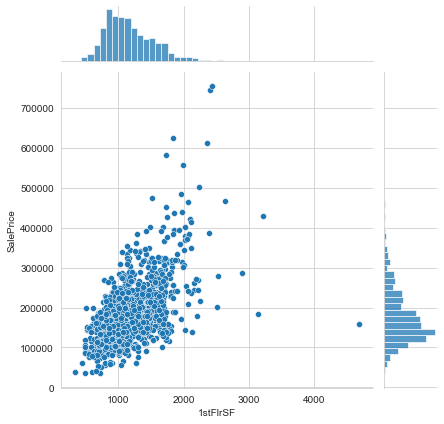

<Figure size 720x720 with 0 Axes>

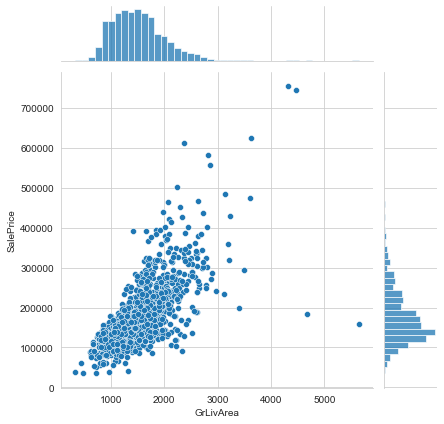

<Figure size 720x720 with 0 Axes>

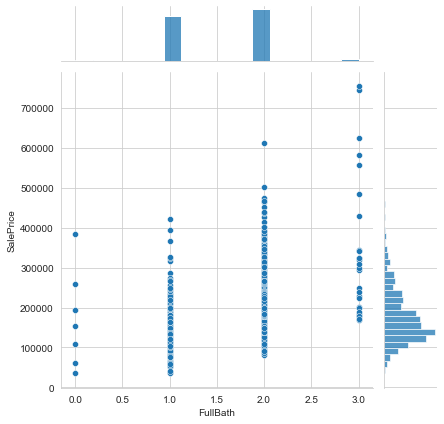

<Figure size 720x720 with 0 Axes>

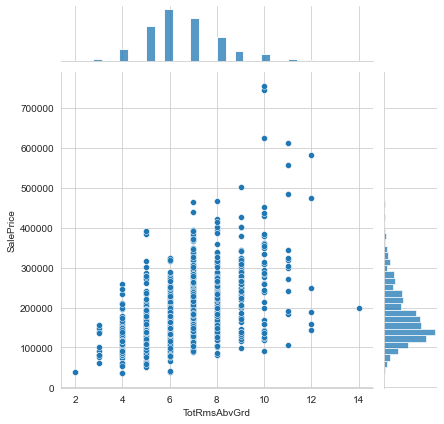

<Figure size 720x720 with 0 Axes>

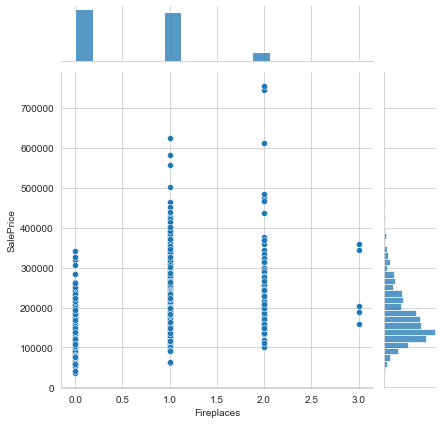

<Figure size 720x720 with 0 Axes>

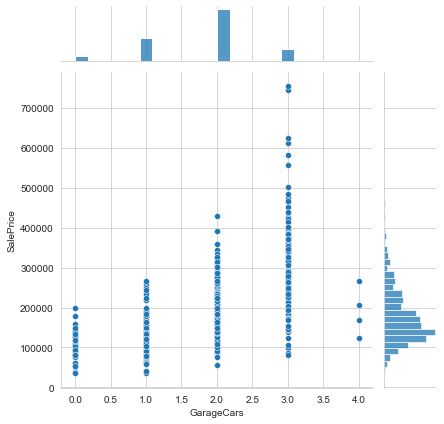

<Figure size 720x720 with 0 Axes>

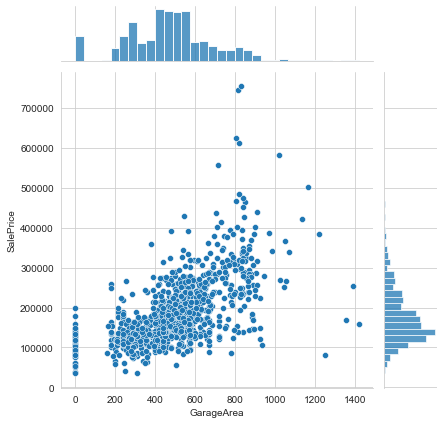

<Figure size 720x720 with 0 Axes>

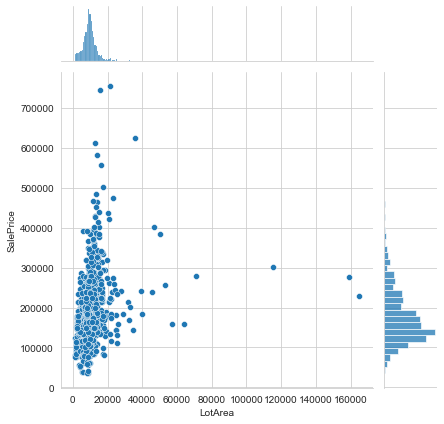

<Figure size 720x720 with 0 Axes>

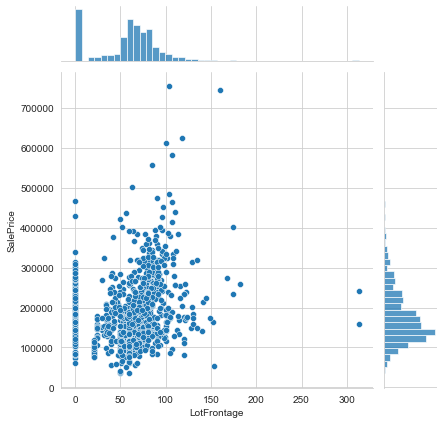

In [12]:
# Plotting histogram and scatter graphs for correlated features in more detail
y = train_df.SalePrice
features = [
    "MasVnrArea",
    "BsmtFinSF1",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "FullBath",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "GarageArea",
    "LotArea",
    "LotFrontage",
]

for features in features:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = train_df[features]
    sns.jointplot(x=x, y=y, data=train_df)

C:\Users\praja\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


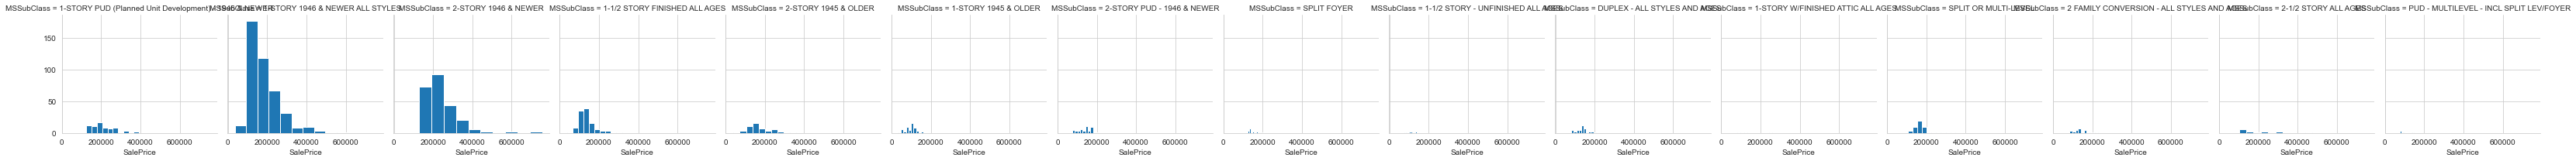

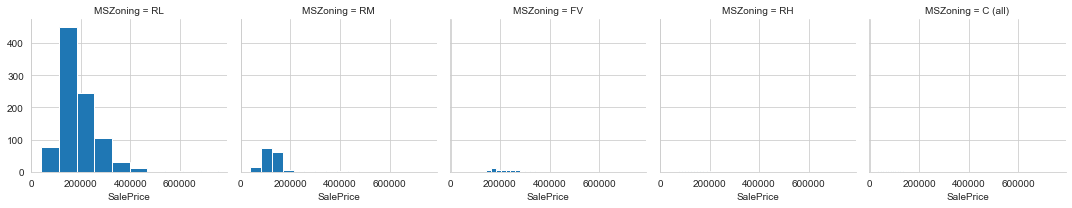

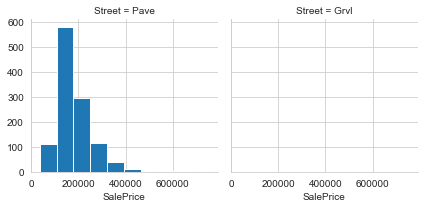

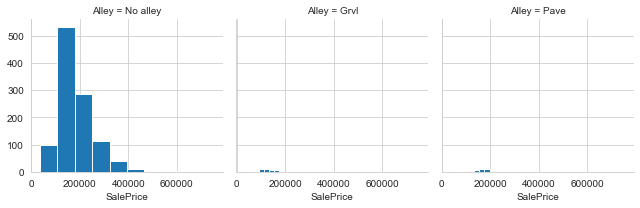

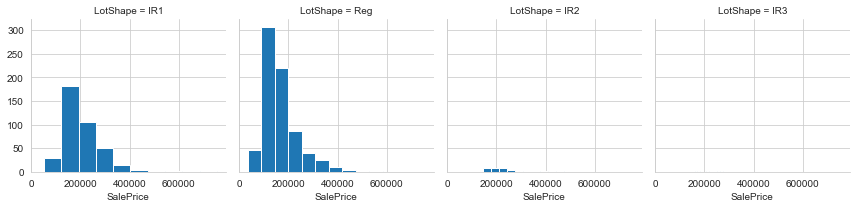

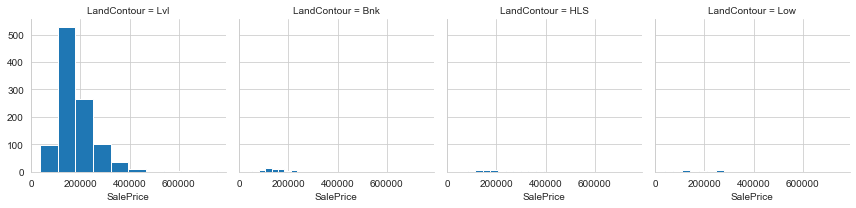

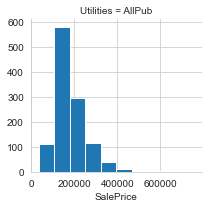

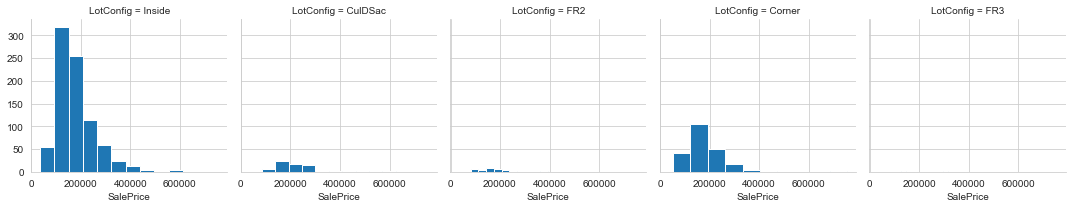

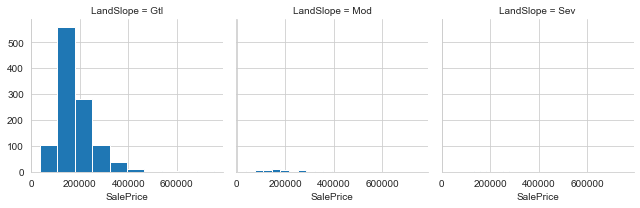

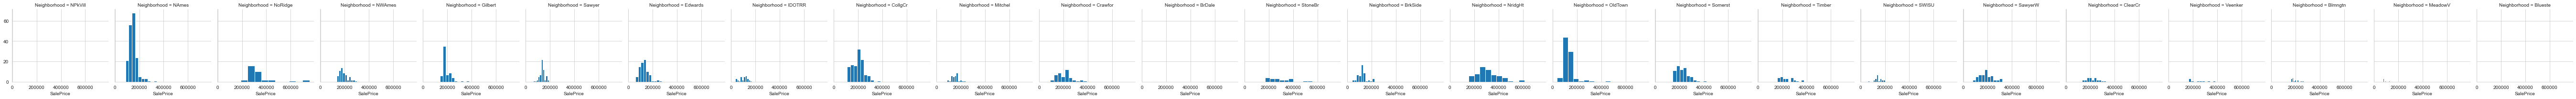

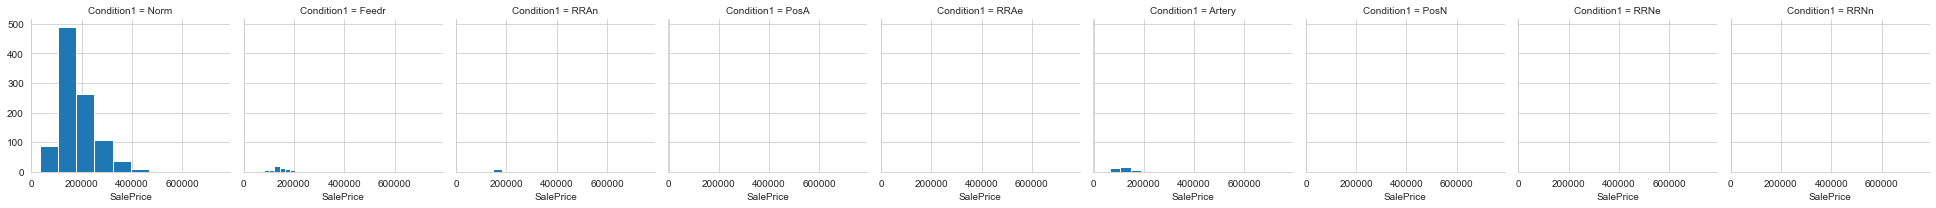

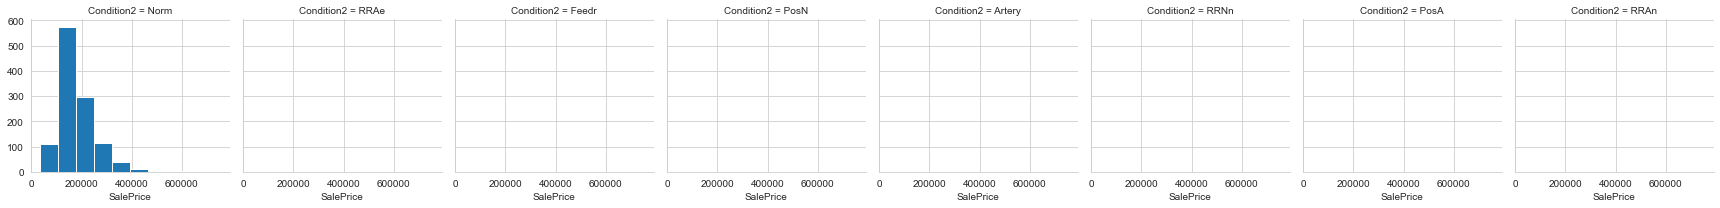

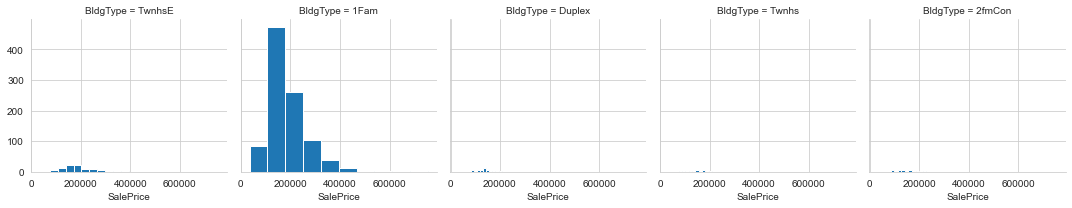

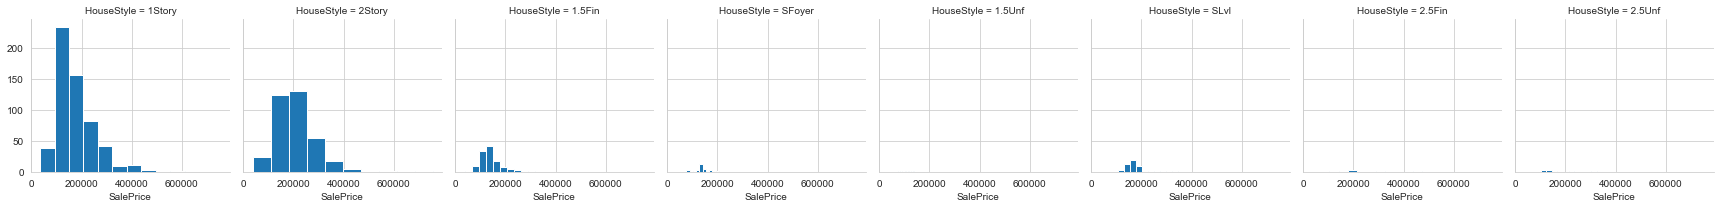

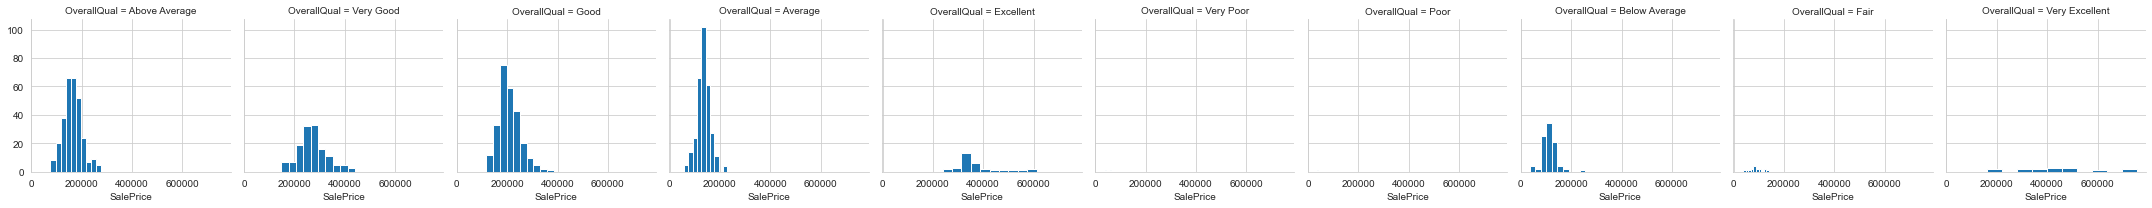

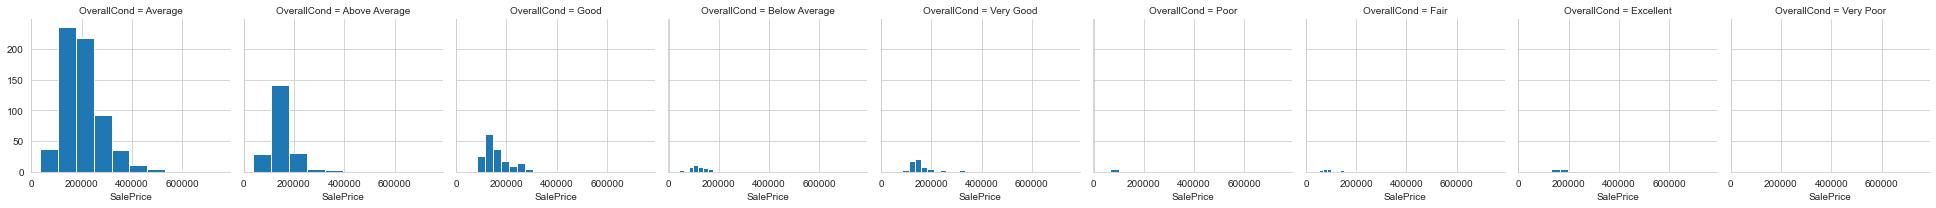

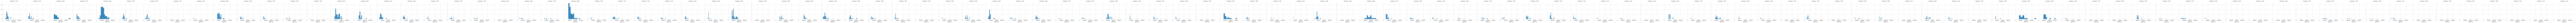

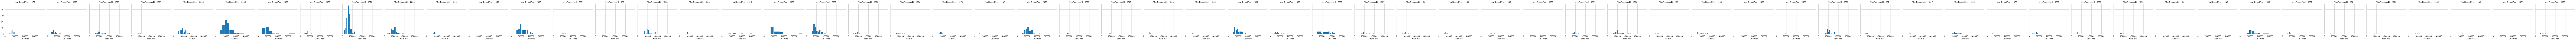

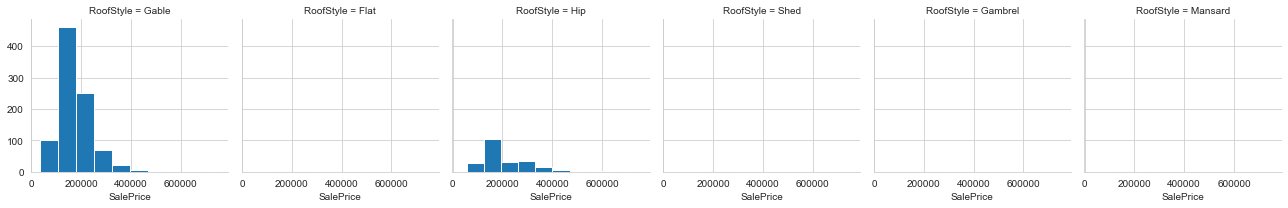

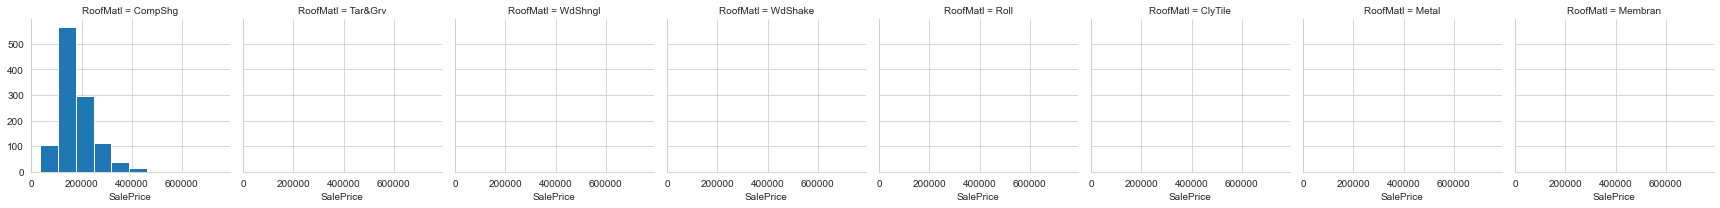

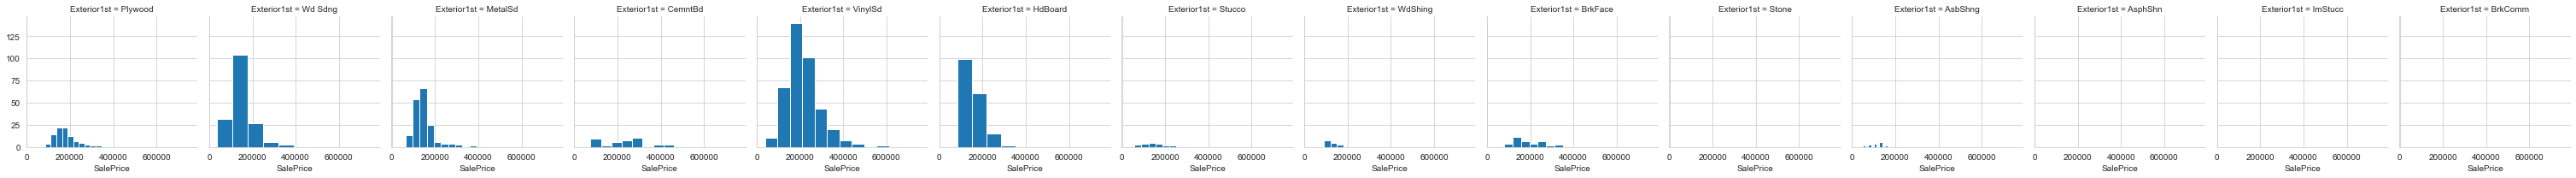

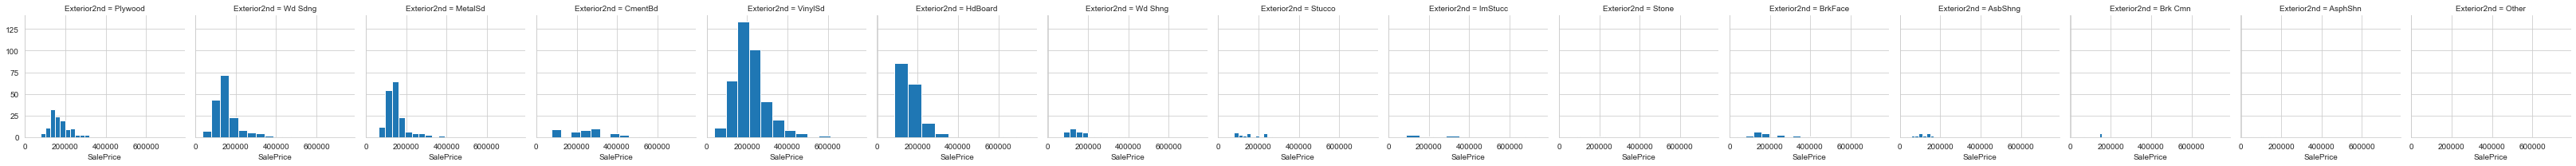

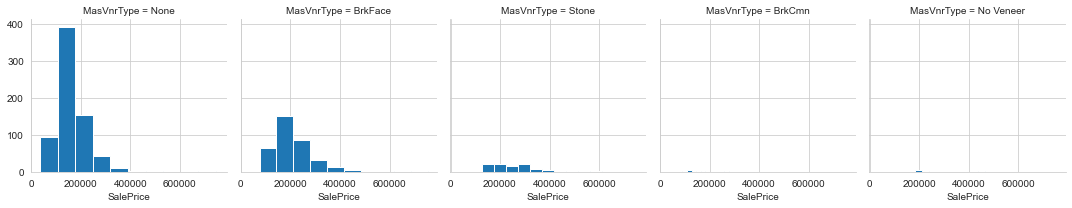

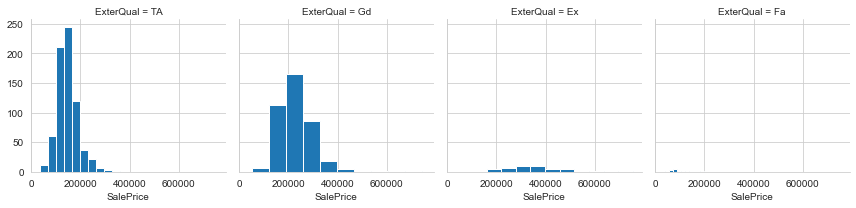

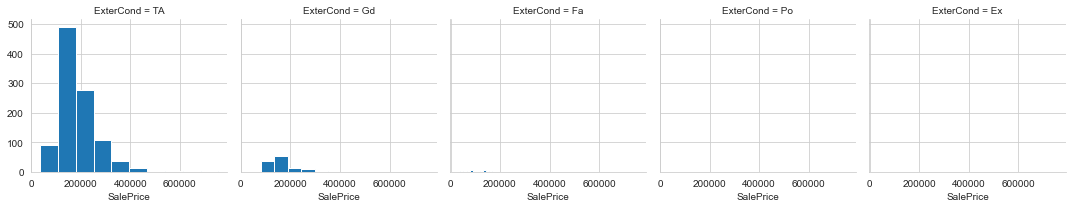

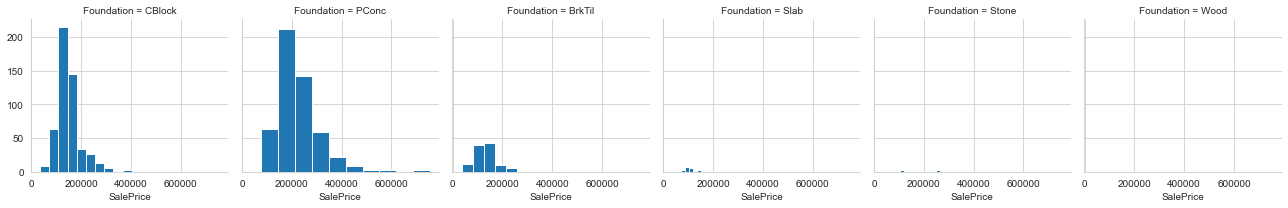

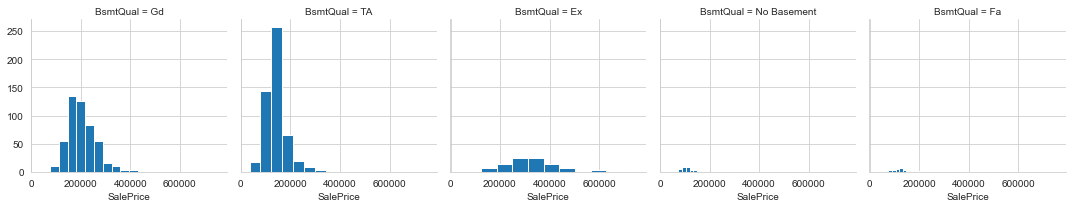

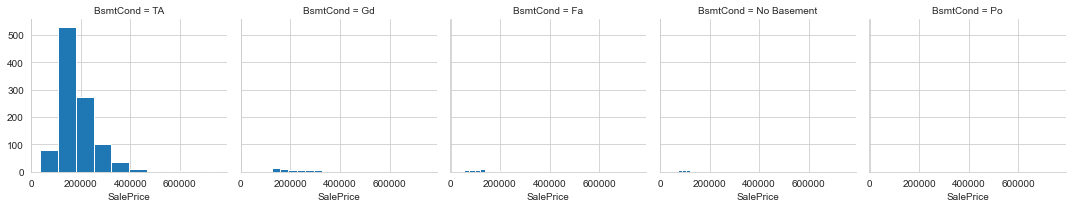

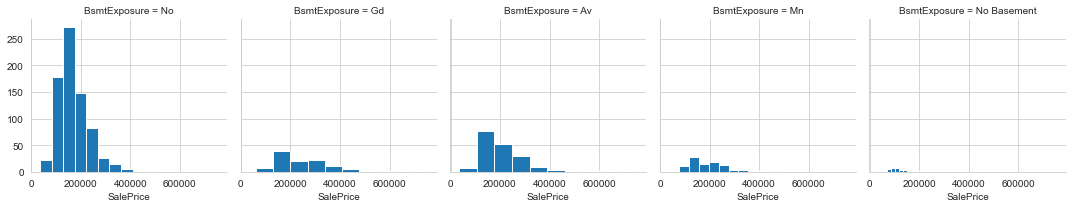

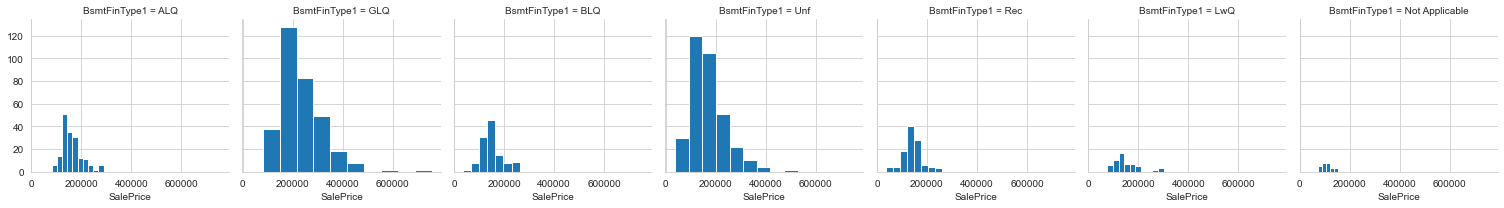

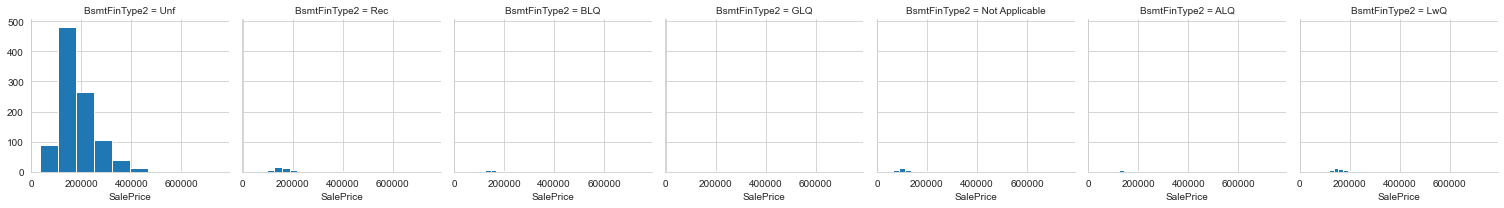

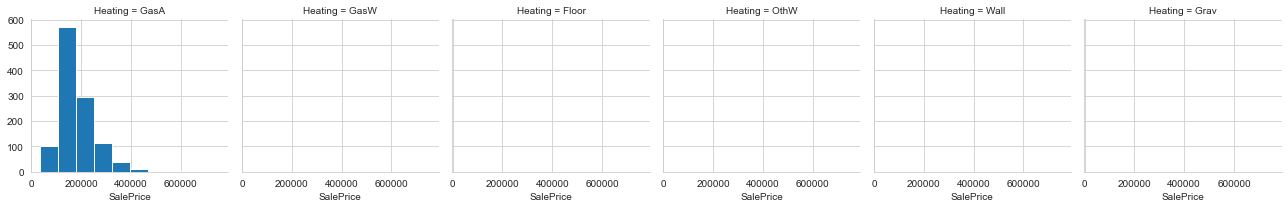

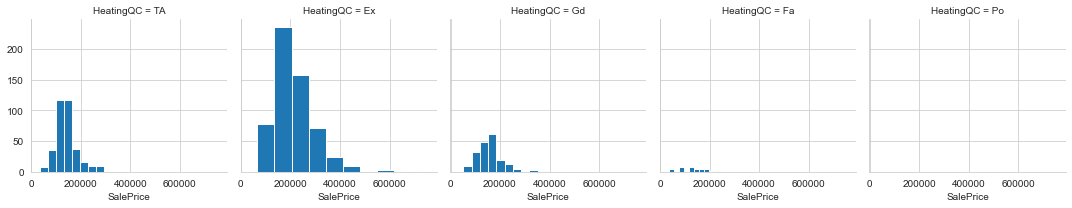

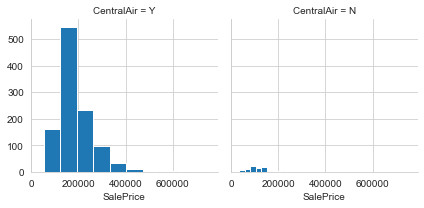

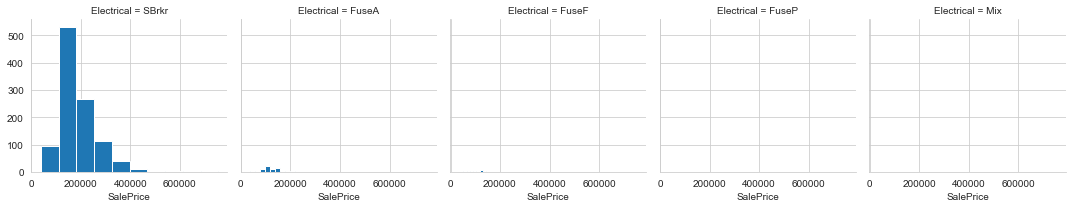

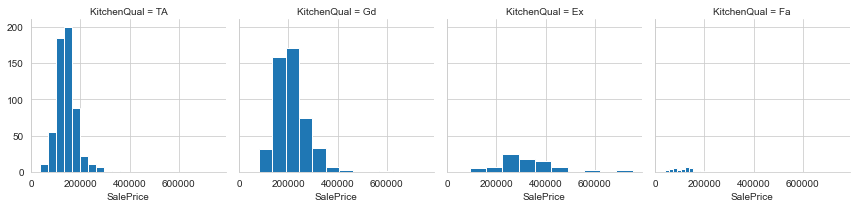

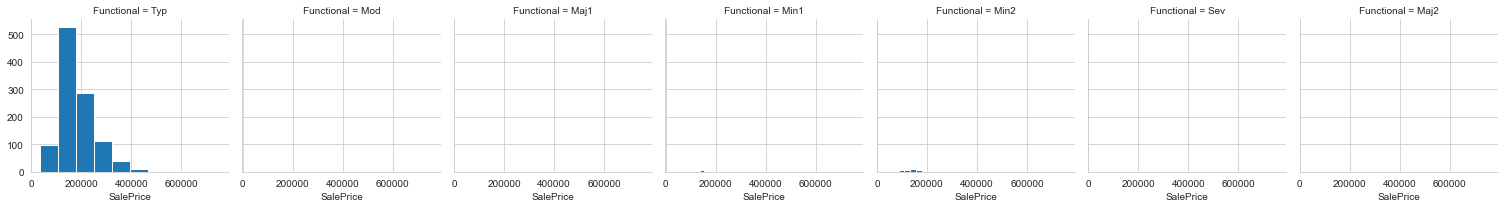

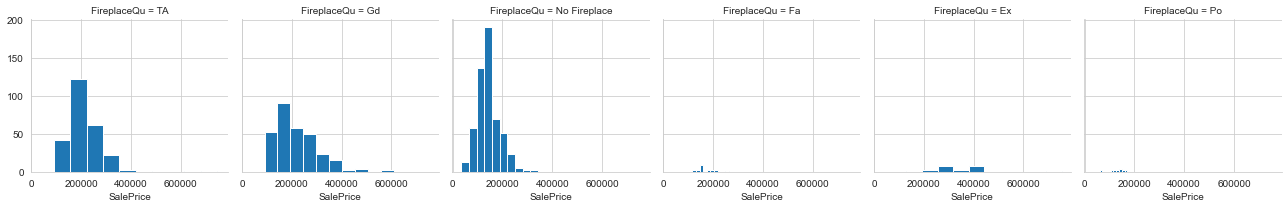

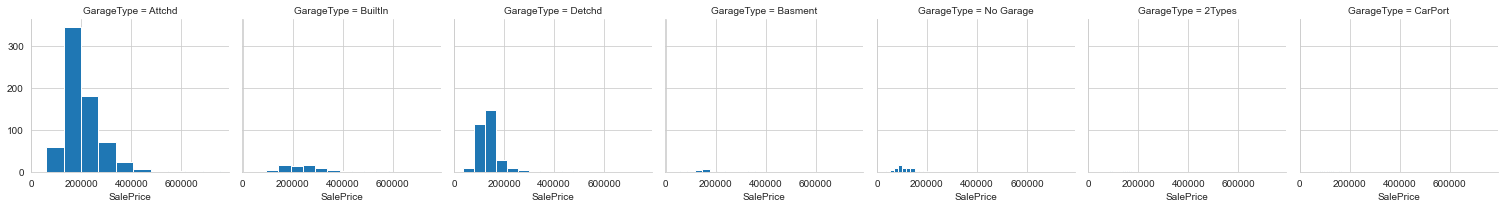

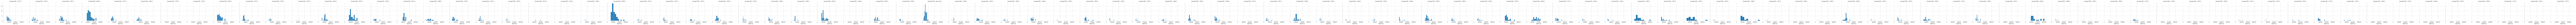

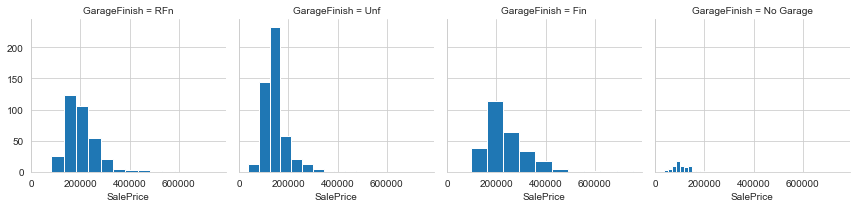

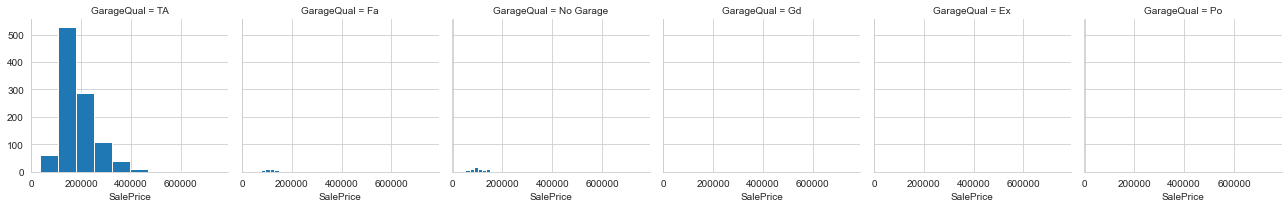

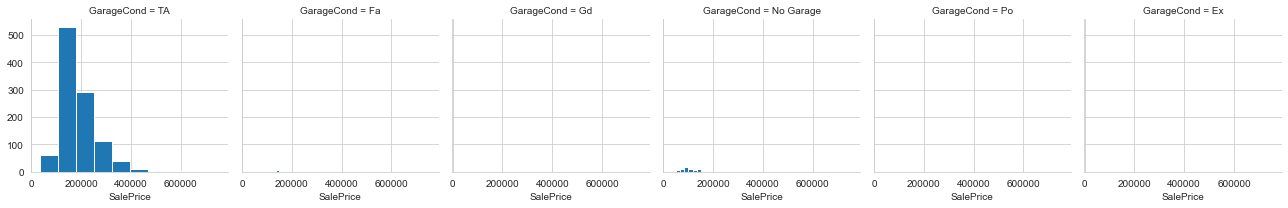

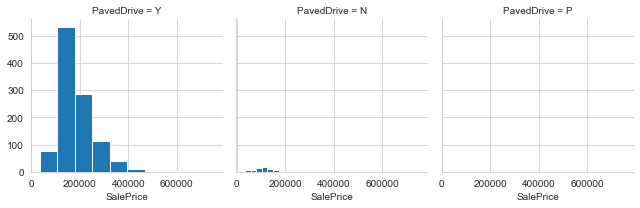

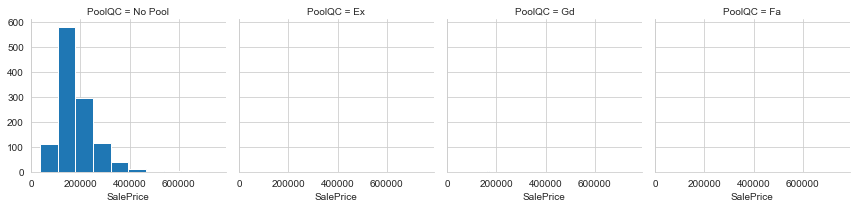

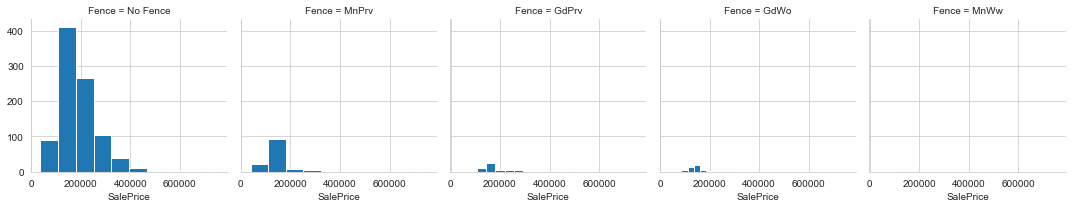

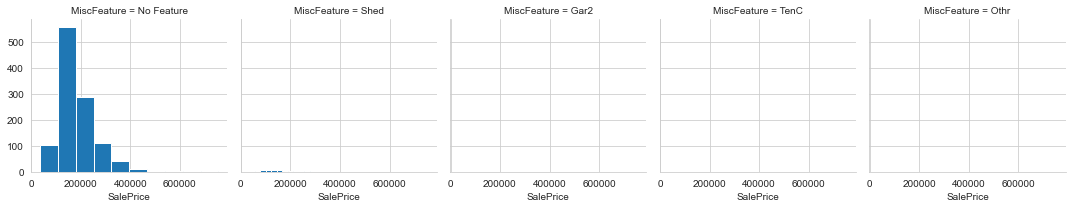

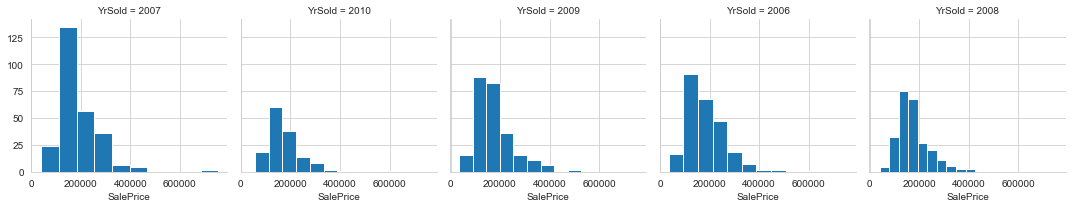

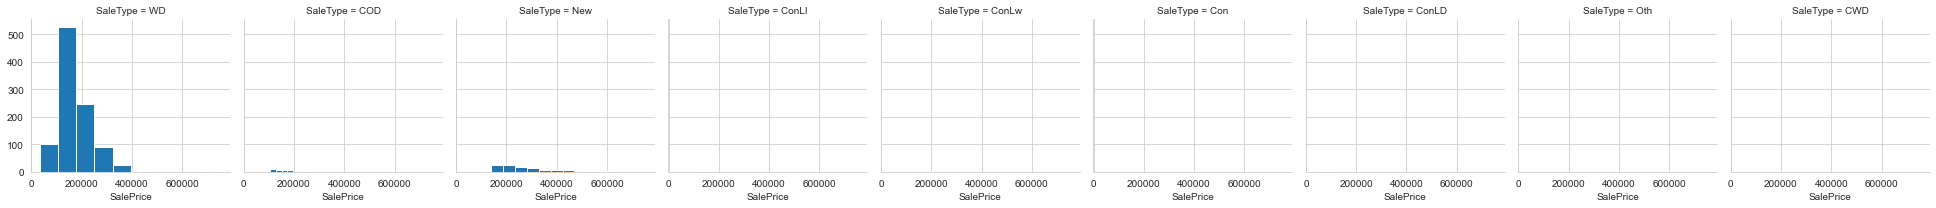

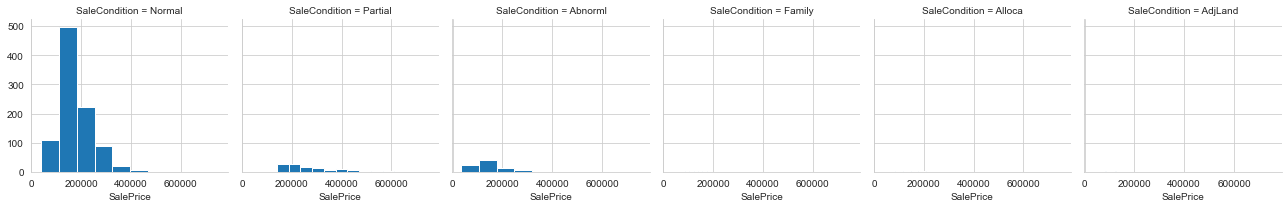

In [13]:
# Plotting for categorical vairbales

features = train_df.select_dtypes(include=['object']).columns

for features in features:
    g = sns.FacetGrid(train_df, col=features)
    g.map(plt.hist, 'SalePrice');

In [14]:
# Converting training and test data to encoded numeric data

class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(
            sparse_matrix.toarray(), columns=new_columns, index=X.index
        )
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f"{column}_<{self.categories_[i][j]}>")
                j += 1
        return new_columns
    
def transform(Train, df):

    # isolate categorical features
    cat_columns = df.select_dtypes(include=["object"]).columns
    cat_df = df[cat_columns]

    # isolate the numeric features
    numeric_df = df.select_dtypes(include=np.number)

    # initialise one hot encoder object spcify handle unknown and auto options to keep test and train same size
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    # Fit the endcoder to training data
    ohe.fit(Train[cat_columns])

    # transform input data
    df_processed = ohe.transform(cat_df)

    # concatinate numeric features from orginal tables with encoded features
    df_processed_full = pd.concat([df_processed, numeric_df], axis=1)

    return df_processed_full

# Transform training data to numeric form
Train_encoded = transform(train_df, train_df)
# Transform test data to numeric form
Test_encoded = transform(train_df, test_df)

# Check data sets are same width minus the two labels in Train
print("Test", Test_encoded.shape, "Train", Train_encoded.shape)

Test (292, 602) Train (1168, 604)


Model building

In [15]:
# Decision Tree

x_train = Train_encoded.drop(columns=["Id", "SalePrice", "SalePrice_log"])
Y_train = Train_encoded.SalePrice_log

def model_pipeline(model, param_grid, scoring):
    Tuned_Model = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)

    # Fit model & Time the process for training the model
    print("running model")
    start_time = time.process_time()

    Tuned_Model.fit(x_train, Y_train)

    # End of fit time
    print(time.process_time() - start_time, "Seconds")
    print("finished running model")
    return Tuned_Model

def plot_mean_scores(Tuned_Model, col, x, y, name):

    Results = pd.DataFrame(Tuned_Model.cv_results_)
    Results_Best = Results.loc[Results.rank_test_score == 1]

    # Initialize a grid of plots
    sns.set(font_scale=1.5)
    sns.set_style("darkgrid")
    col = col
    for col in col:
        grid = sns.FacetGrid(
            Results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=15,
        )

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot, x, y, marker="o", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)

running model
1.296875 Seconds
finished running model


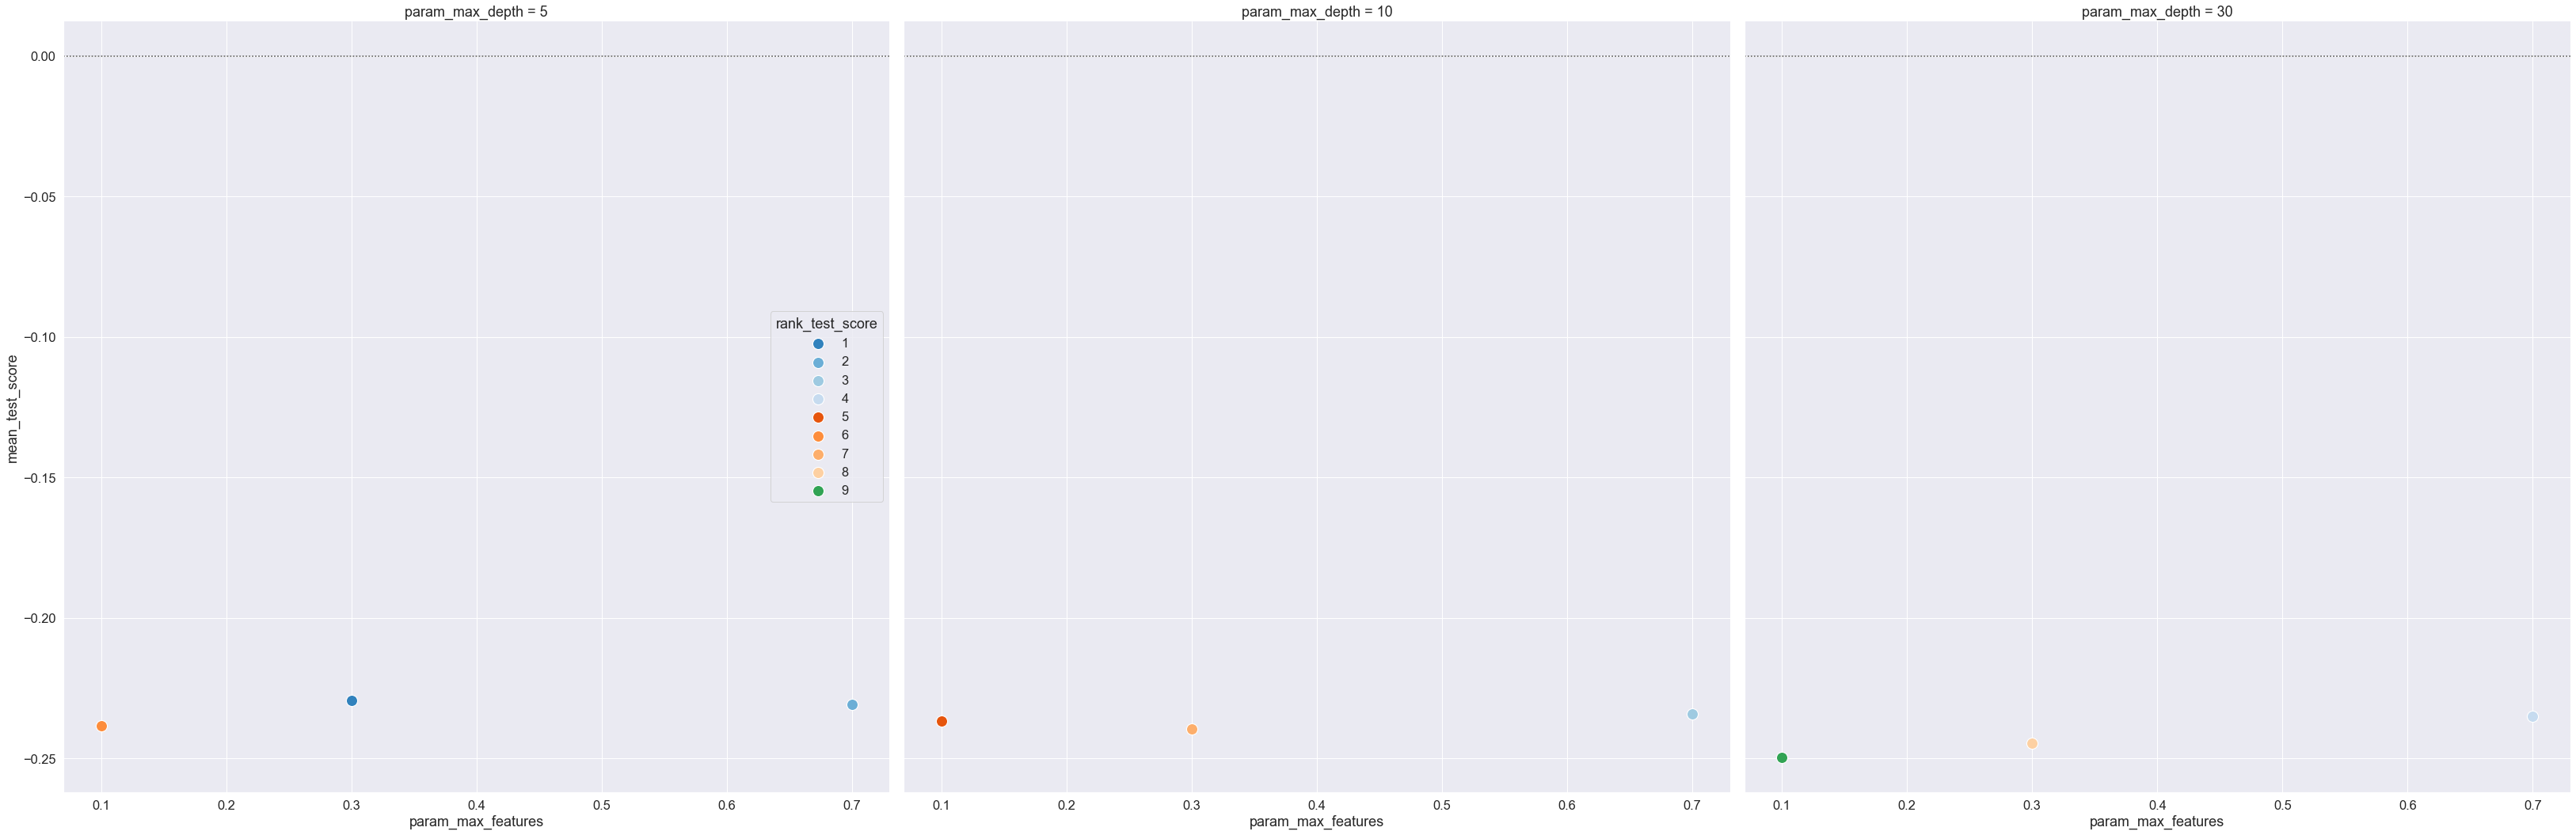

In [16]:
# Set paramters for Grid Search CV
param_grid = {"max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],}
model = DecisionTreeRegressor(criterion="mse", random_state=0)

Tuned_Model = model_pipeline(model, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(Tuned_Model,["param_max_depth"],"param_max_features","mean_test_score","DecisionTree",)

running model
72.71875 Seconds
finished running model


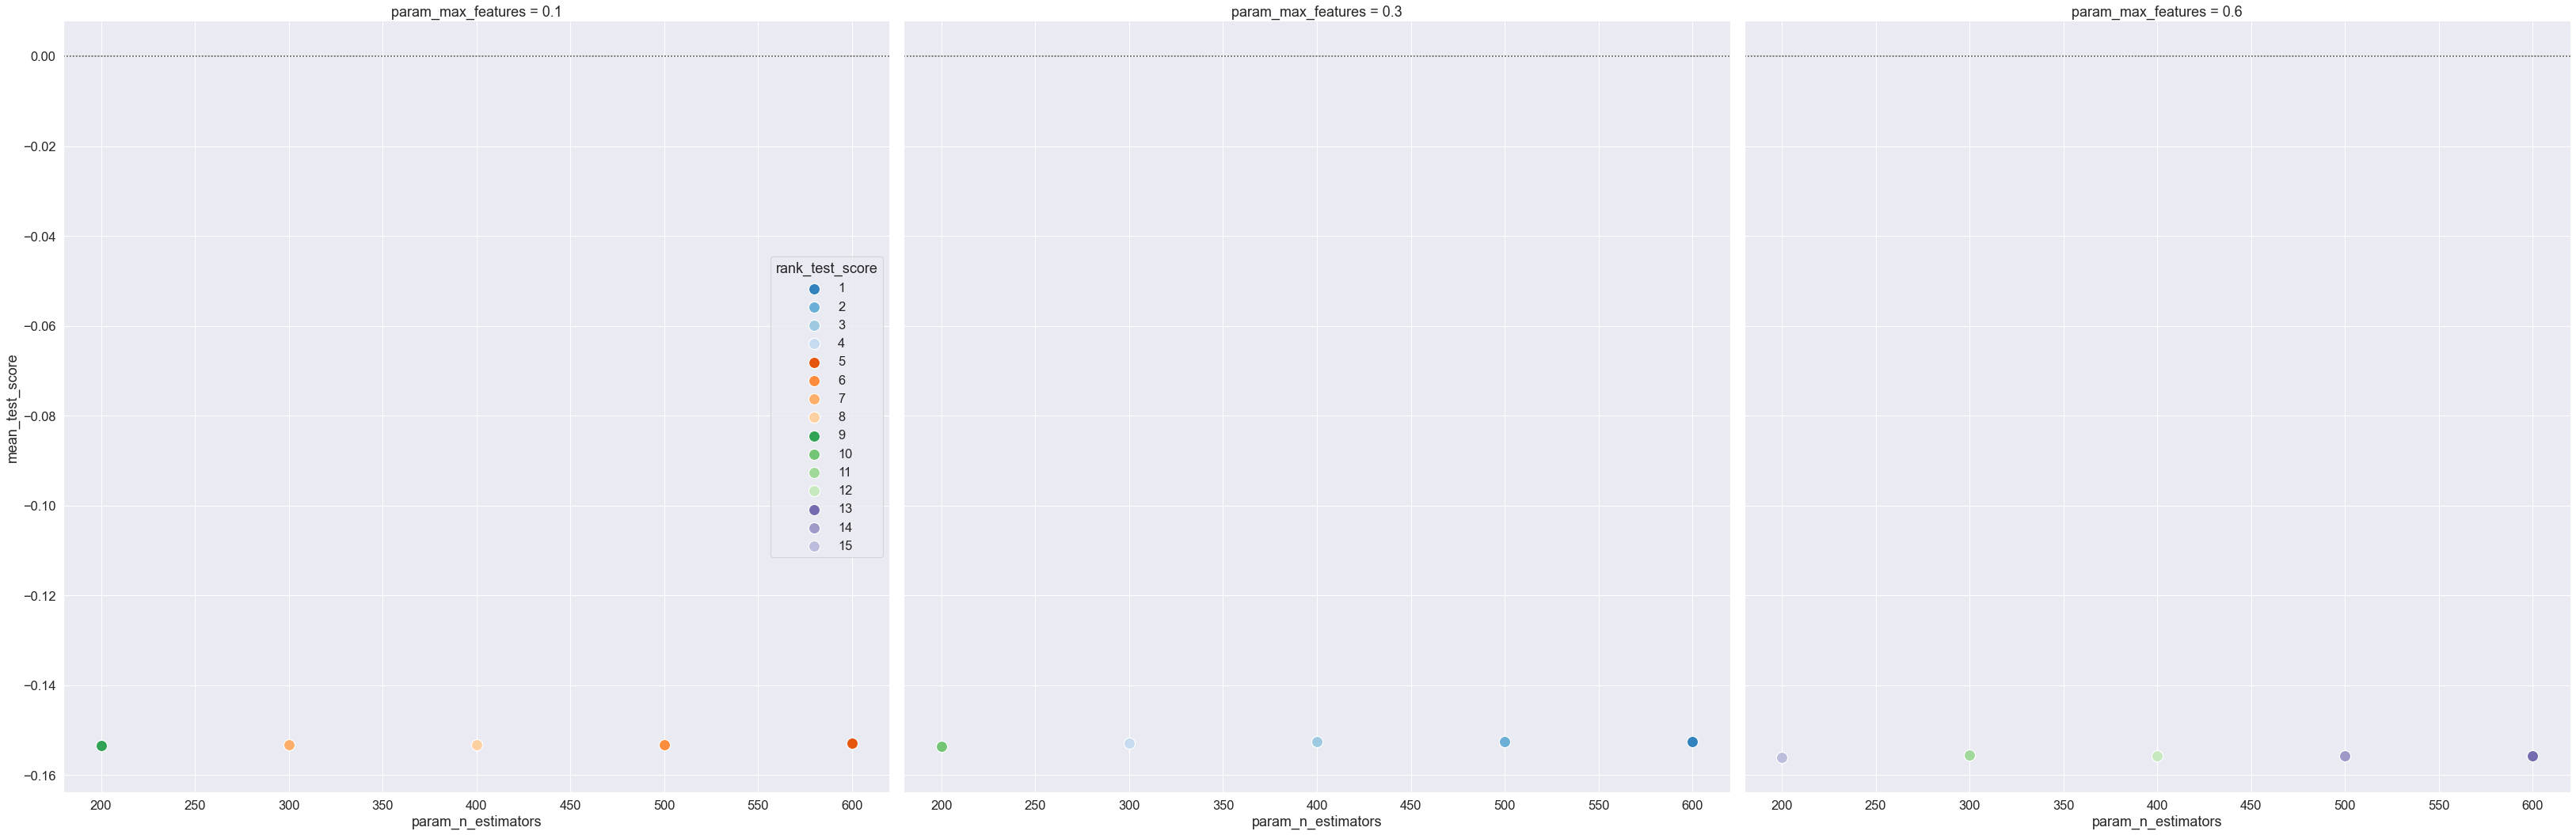

In [17]:
# Build a random forest
# Set paramters for Grid Search
param_grid = {"n_estimators": [200, 300, 400, 500, 600],
    "max_features": [0.1, 0.3, 0.6],}
# Initialise the random forest model
model2 = RandomForestRegressor(n_jobs=-1, random_state=0, bootstrap=True)

Tuned_Model2 = model_pipeline(model2, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(Tuned_Model2,["param_max_features"],"param_n_estimators","mean_test_score","RandomForest",)

running model
186.96875 Seconds
finished running model


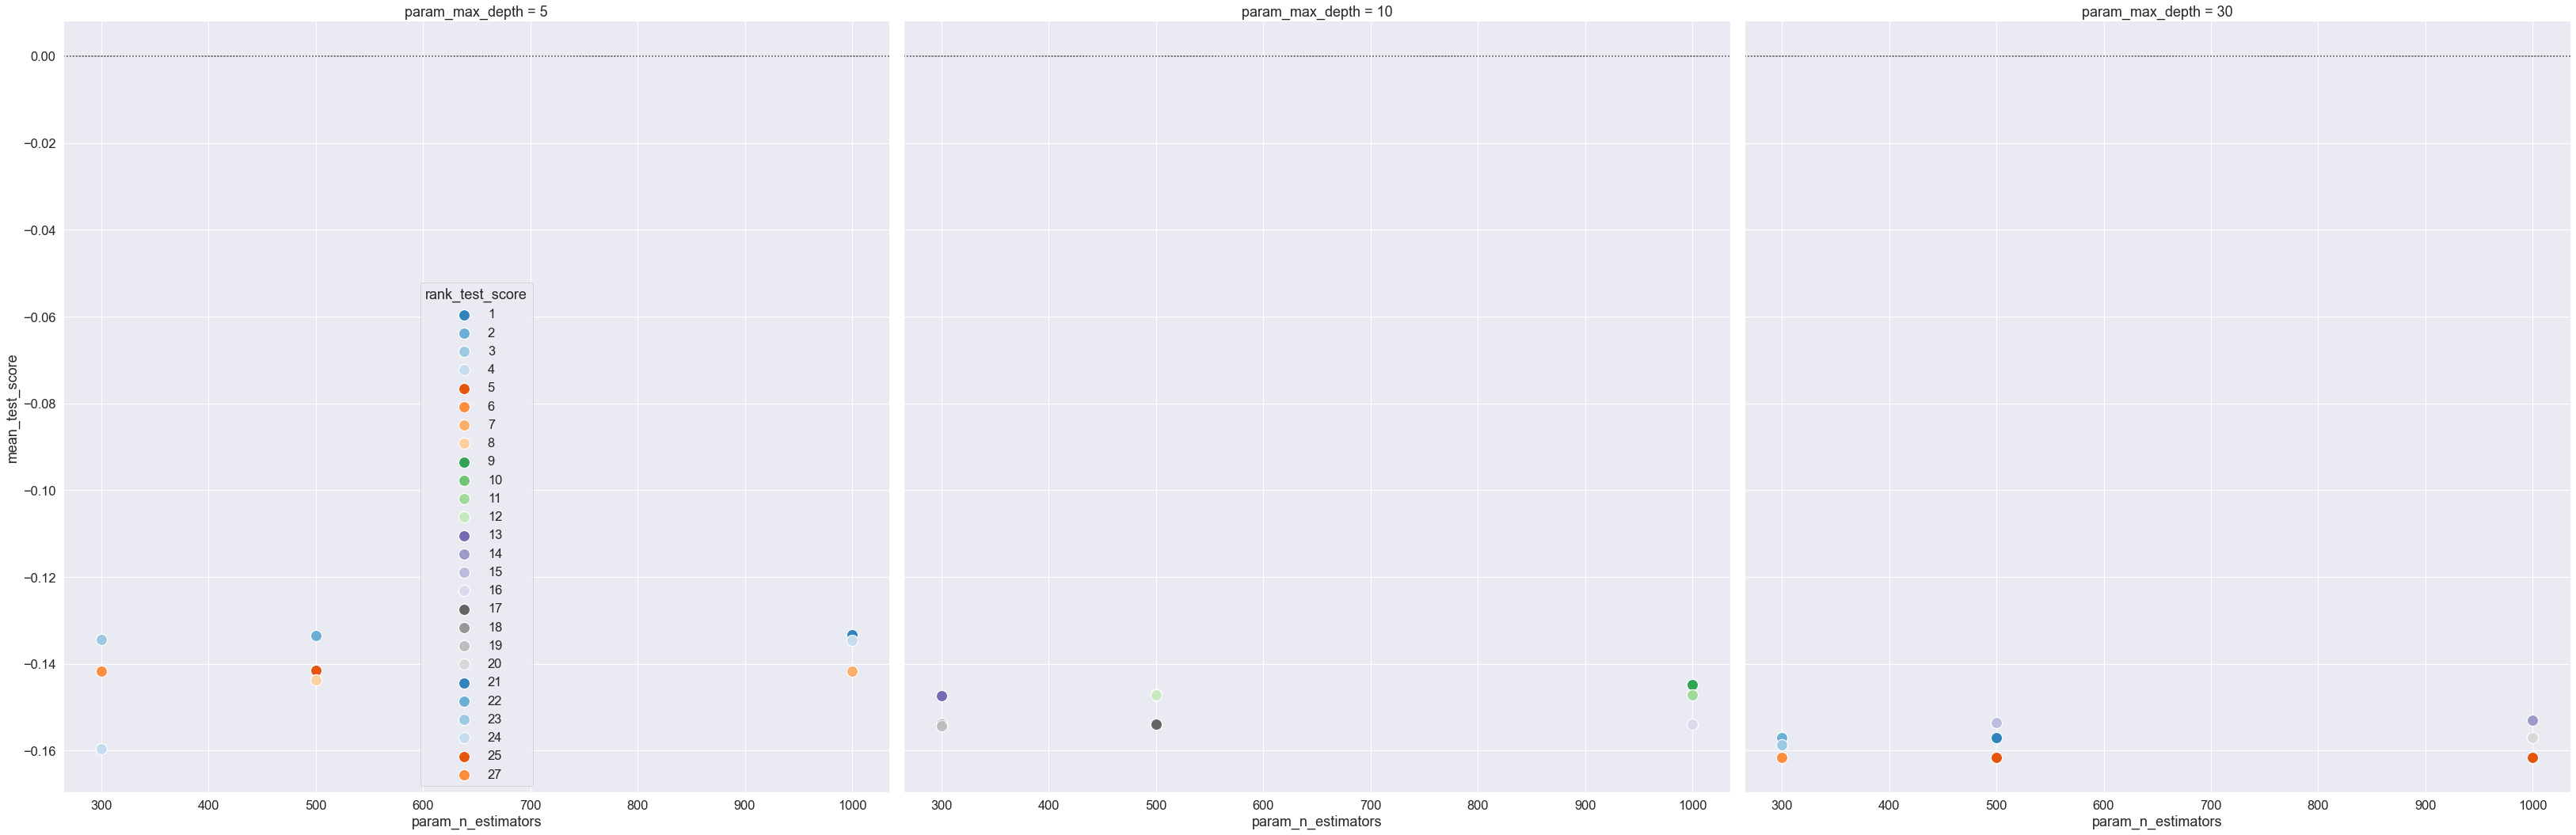

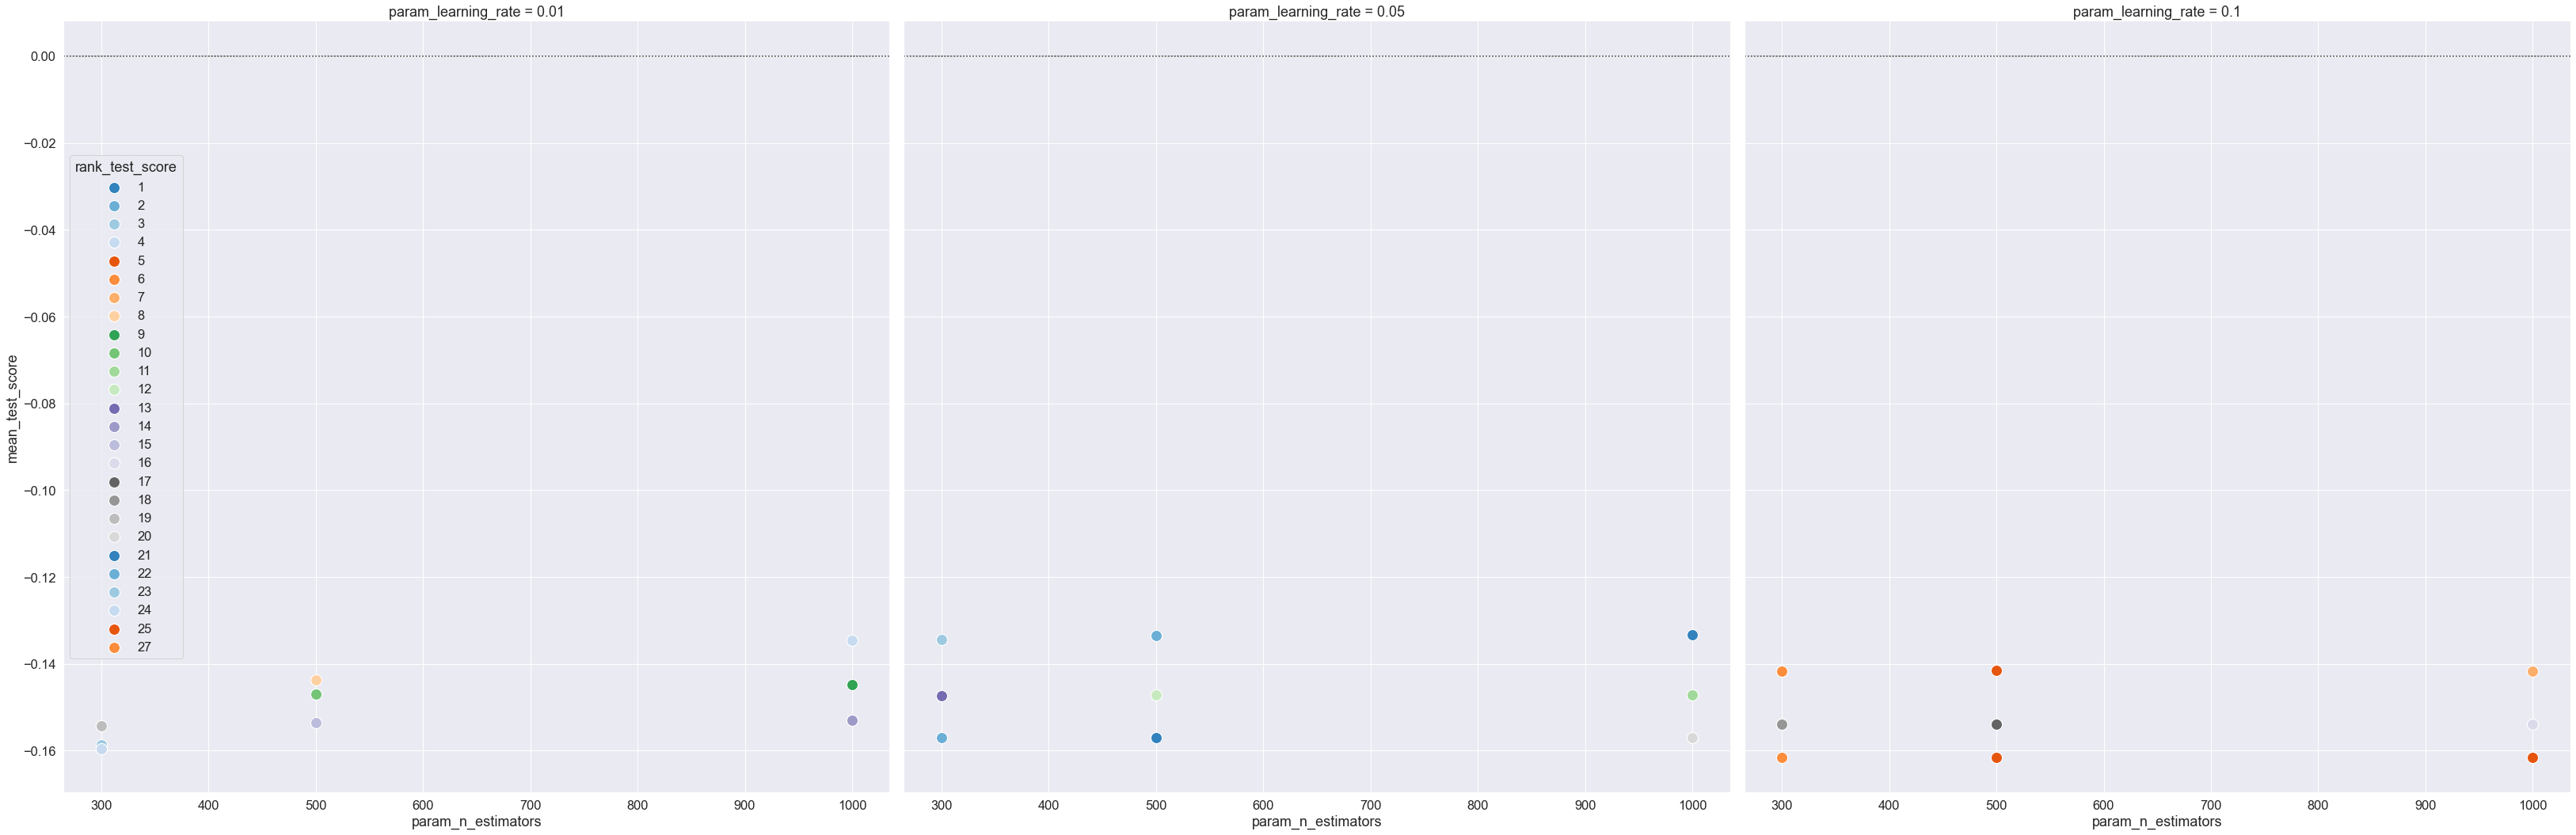

In [18]:
# Model 3: Gradient Boosting Regressor
# Set paramters for Grid Search CV
param_grid = {"n_estimators": [300, 500, 1000],
    "max_depth": [5, 10, 30],
    "learning_rate": [0.01, 0.05, 0.1],}
model3 = GradientBoostingRegressor(random_state=0, max_features="sqrt")

Tuned_Model3 = model_pipeline(model3, param_grid, "neg_root_mean_squared_error")
plot_mean_scores(Tuned_Model3,["param_max_depth", "param_learning_rate"],"param_n_estimators","mean_test_score","GradientBoosting",)

Best fit run model is Decision Treee